# 13: Quantum Error Correction

In [1]:
from renom_q import *

Quantum error correction is a function that automatically corrects quantum errors in general, including phase inversion error and phase bit inversion error, in addition to bit inversion error.

## 13-1: Quantum error correction of bit inversion error

The bit inversion error can be thought of as an error like a bit change when bit inversion operator X is performed.  
Error correction is performed by performing some calculations by iteratively decoding one qubit to be error-corrected, and then decrypting.  
By using the toffoli gate after decryption, even if noise or bug occurs in the course of some computation it can be correctly decoded.  
Even when noise enters the first or second auxiliary bit from the lower order in the process of some calculation, decryption can be performed firmly by using the toffoli gate.  
In quantum error correction only the upper bits are of interest, so the lower bits of the output are not used here.

$$\left| 100 \right\rangle \xrightarrow{encode} \left| 111 \right\rangle \xrightarrow{X} \left| 110 \right\rangle \xrightarrow{decode} \left| 101 \right\rangle　\xrightarrow{ccX} \left| 101 \right\rangle$$

{'1': 1024}


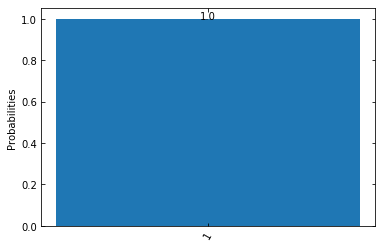

In [2]:
bn = 3
cn = 1
q = QuantumRegister(bn)
c = ClassicalRegister(cn)
qc = QuantumCircuit(q, c)

qc.x(q[0])

qc.cx(q[0], q[1])
qc.cx(q[0], q[2])

qc.x(q[2])

qc.cx(q[0], q[2])
qc.cx(q[0], q[1])
qc.ccx(q[2], q[1], q[0])

qc.measure(q[0], c[0])

r = execute(qc)
print(r)
plot_histogram(r)

## 13-2: Quantum error correction of phase inversion error

The phase inversion error can be thought of as an error such as a phase change when performing the phase inversion operator Z.  
Z becomes a bit inversion error X if it is sandwiched by Hadamard transformation from HZH = X.  
Therefore, the quantum error correction gate of the phase inversion error Z can be replaced by the quantum error correction gate of the bit inversion error X by sandwiching the phase inversion error Z with the Hadamard transformation H.

$$\left| 100 \right\rangle \xrightarrow{encode} \left| 111 \right\rangle \xrightarrow{H \otimes H \otimes H} \left| --- \right\rangle  \xrightarrow{Z} \left| -+- \right\rangle  \xrightarrow{H \otimes H \otimes H} \left| 101 \right\rangle \xrightarrow{decode} \left| 110 \right\rangle　\xrightarrow{ccX} \left| 110 \right\rangle$$

{'1': 1024}


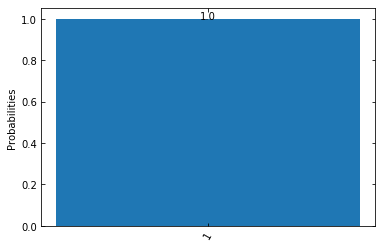

In [3]:
bn = 3
cn = 1
q = QuantumRegister(bn)
c = ClassicalRegister(cn)
qc = QuantumCircuit(q, c)

qc.x(q[0])
qc.cx(q[0], q[1])
qc.cx(q[0], q[2])
for i in range(bn):
    qc.h(q[i])

qc.z(q[1])

for i in range(bn):
    qc.h(q[i])
qc.cx(q[0], q[2])
qc.cx(q[0], q[1])
qc.ccx(q[2], q[1], q[0])

qc.measure(q[0], c[0])

r = execute(qc)
print(r)
plot_histogram(r)